<br>

<div align=center><font color=maroon size=6><b>Introduction</b></font></div>

<br>

<font size=4><b>References:</b></font>
1. TF2 official tutorials: <a href="https://www.tensorflow.org/datasets" style="text-decoration:none;">TensorFlow Datasets</a> 
    * `TensorFlow > Resources > `Datasets > Guide > <a href="https://www.tensorflow.org/datasets/overview" style="text-decoration:none;">Introduction</a>
        * Run in <a href="https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb" style="text-decoration:none;">Google Colab</a>

<br>
<br>
<br>

# TensorFlow Datasets

<font size=3 color=maroon>TFDS provides a collection of ready-to-use datasets for use with TensorFlow, Jax, and other Machine Learning frameworks.</font>

<font size=3 color=maroon>It handles downloading and preparing the data deterministically and constructing a `tf.data.Dataset` (or `np.array`).</font>

<font size=3 color=maroon>**Note**: Do not confuse [TFDS](https://www.tensorflow.org/datasets) (this ***library***) with `tf.data` (TensorFlow ***API*** to build efficient data pipelines). TFDS is a high level wrapper around `tf.data`. If you're not familiar with this API, we encourage you to read [the official tf.data guide](https://www.tensorflow.org/guide/data) first.</font>


<br>

## Installation

<font size=3 color=maroon>TFDS exists in two packages:

* `pip install tensorflow-datasets`: The stable version, released every few months.
* `pip install tfds-nightly`: Released every day, contains the last versions of the datasets.

This colab uses `tfds-nightly`:</font>


In [1]:
# !pip install -q tfds-nightly tensorflow matplotlib

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds


import numpy as np
import matplotlib.pyplot as plt

D:\Programs\Anaconda3\envs\tfg\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<br>

## Find available datasets

All dataset builders are subclass of `tfds.core.DatasetBuilder`. To get the list of available builders, use `tfds.list_builders()` or look at our [catalog](https://www.tensorflow.org/datasets/catalog/overview).

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'cs_restaurants',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adr

<br>
<br>
<br>

## Load a dataset

### tfds.load

<font size=3 color=maroon>The easiest way of loading a dataset is `tfds.load`. It will:

1. Download the data and save it as [`tfrecord`](https://www.tensorflow.org/tutorials/load_data/tfrecord) files.
2. Load the `tfrecord` and create the `tf.data.Dataset`.
</font>

In [4]:
ds = tfds.load('mnist', 
               split='train', 
               shuffle_files=True,
               data_dir="D:/KeepStudy/0_Coding/0_dataset/tensorflow_datasets/")

assert isinstance(ds, tf.data.Dataset)
print(ds)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                         | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                         | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                         | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                         | 0/4 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                         | 0/4 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:  25%|████████████████▎                                                | 1/4 [00:00<00:02,  1.17 url/s]
Dl Size...: 0 MiB [00:00

Extraction completed...:  75%|██████████████████████████████████████████              | 3/4 [00:10<00:01,  1.44s/ file]

Dl Size...: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.24 MiB/s]

Generating splits...:   0%|                                                                 | 0/2 [00:00<?, ? splits/s]
Generating train examples...: 0 examples [00:00, ? examples/s]
Generating train examples...: 1 examples [00:01,  1.40s/ examples]
Generating train examples...: 174 examples [00:01, 160.50 examples/s]
Generating train examples...: 363 examples [00:01, 359.04 examples/s]
Generating train examples...: 545 examples [00:01, 564.16 examples/s]
Generating train examples...: 722 examples [00:01, 766.27 examples/s]
Generating train examples...: 899 examples [00:01, 960.38 examples/s]
Generating train examples...: 1093 examples [00:02, 1148.57 examples/s]
Generating train examples...: 1268 examples [00:02, 1285.99 examples/s]
Generating tra

Generating train examples...: 17108 examples [00:11, 1763.76 examples/s]
Generating train examples...: 17295 examples [00:11, 1755.97 examples/s]
Generating train examples...: 17471 examples [00:11, 1752.03 examples/s]
Generating train examples...: 17650 examples [00:11, 1756.72 examples/s]
Generating train examples...: 17837 examples [00:11, 1755.25 examples/s]
Generating train examples...: 18027 examples [00:11, 1758.16 examples/s]
Generating train examples...: 18207 examples [00:11, 1764.16 examples/s]
Generating train examples...: 18398 examples [00:11, 1761.82 examples/s]
Generating train examples...: 18583 examples [00:12, 1757.64 examples/s]
Generating train examples...: 18762 examples [00:12, 1759.57 examples/s]
Generating train examples...: 18938 examples [00:12, 1610.09 examples/s]
Generating train examples...: 19105 examples [00:12, 1597.64 examples/s]
Generating train examples...: 19289 examples [00:12, 1634.98 examples/s]
Generating train examples...: 19472 examples [00:12

Generating train examples...: 36896 examples [00:22, 1767.91 examples/s]
Generating train examples...: 37083 examples [00:22, 1772.00 examples/s]
Generating train examples...: 37267 examples [00:22, 1773.46 examples/s]
Generating train examples...: 37451 examples [00:22, 1775.46 examples/s]
Generating train examples...: 37637 examples [00:22, 1781.61 examples/s]
Generating train examples...: 37824 examples [00:22, 1781.35 examples/s]
Generating train examples...: 38010 examples [00:23, 1786.94 examples/s]
Generating train examples...: 38196 examples [00:23, 1783.61 examples/s]
Generating train examples...: 38375 examples [00:23, 1785.00 examples/s]
Generating train examples...: 38554 examples [00:23, 1777.11 examples/s]
Generating train examples...: 38739 examples [00:23, 1762.70 examples/s]
Generating train examples...: 38935 examples [00:23, 1769.50 examples/s]
Generating train examples...: 39121 examples [00:23, 1776.39 examples/s]
Generating train examples...: 39307 examples [00:23

Generating train examples...: 56690 examples [00:33, 1780.40 examples/s]
Generating train examples...: 56878 examples [00:33, 1785.32 examples/s]
Generating train examples...: 57064 examples [00:33, 1766.13 examples/s]
Generating train examples...: 57242 examples [00:33, 1758.44 examples/s]
Generating train examples...: 57428 examples [00:33, 1767.87 examples/s]
Generating train examples...: 57613 examples [00:34, 1772.33 examples/s]
Generating train examples...: 57808 examples [00:34, 1782.16 examples/s]
Generating train examples...: 57994 examples [00:34, 1784.04 examples/s]
Generating train examples...: 58180 examples [00:34, 1789.08 examples/s]
Generating train examples...: 58368 examples [00:34, 1793.15 examples/s]
Generating train examples...: 58554 examples [00:34, 1793.95 examples/s]
Generating train examples...: 58738 examples [00:34, 1787.96 examples/s]
Generating train examples...: 58921 examples [00:34, 1780.99 examples/s]
Generating train examples...: 59105 examples [00:34

Dataset mnist downloaded and prepared to D:/KeepStudy/0_Coding/0_dataset/tensorflow_datasets/mnist\3.0.1. Subsequent calls will reuse this data.
<_OptionsDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


<br>

In [5]:
# 用于验证自己前面下载过的一个 mnist 数据集，在路径 D:/KeepStudy/0_Coding/0_dataset/ 之下。
# 从运行结果来看，初步判断这两个数据集是一样的。
ds = tfds.load('mnist', 
               split='train', 
               shuffle_files=True,
               data_dir="D:/KeepStudy/0_Coding/0_dataset/")

assert isinstance(ds, tf.data.Dataset)
print(ds)

<_OptionsDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


<br>

Some common arguments:

*   `split=`: Which split to read (e.g. `'train'`, `['train', 'test']`, `'train[80%:]'`,...). See our [split API guide](https://www.tensorflow.org/datasets/splits).
*   `shuffle_files=`: <font color=maroon>Control whether to shuffle the files between each epoch (**TFDS store big datasets in multiple smaller files**).</font>
*   `data_dir=`: Location where the dataset is saved (
defaults to `~/tensorflow_datasets/`)
*   `with_info=True`: Returns the `tfds.core.DatasetInfo` containing dataset metadata
*   `download=False`: Disable download


<br>
<br>

### tfds.builder

<font size=3 color=maroon>`tfds.load` is a thin wrapper around `tfds.core.DatasetBuilder`. You can get the same output using the `tfds.core.DatasetBuilder` API:</font>

In [7]:
builder = tfds.builder('mnist')
# 1. Create the tfrecord files (no-op if already exists)
# 锐平：下载下来的文件组织形式与 tfds.load('mnist') 下载下来的不一样
builder.download_and_prepare(download_dir=
                             "D:/KeepStudy/0_Coding/0_dataset/tensorflow_datasets/mnist_builer")

# 2. Load the `tf.data.Dataset`
ds = builder.as_dataset(split='train', shuffle_files=True)
print(ds)

<_OptionsDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


<br>
<br>

### `tfds build` CLI

<font size=3 color=maroon>If you want to generate a specific dataset, you can use the [`tfds` command line](https://www.tensorflow.org/datasets/cli). 

For example:</font>

```sh
tfds build mnist
```

See [the doc](https://www.tensorflow.org/datasets/cli) for available flags.

<br>
<br>
<br>

## Iterate over a dataset

### As dict

<font size=3 color=maroon>By default, the `tf.data.Dataset` object contains a `dict` of `tf.Tensor`s:</font>

<br>

In [8]:
ds = tfds.load('mnist', 
               split='train', 
               data_dir="D:/KeepStudy/0_Coding/0_dataset/tensorflow_datasets")

ds = ds.take(1)      # Only take a single example

for example in ds:   # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
    print(list(example.keys()))
    image = example["image"]
    label = example["label"]
    print(image.shape, label)

['image', 'label']
(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


<br>

<font size=3 color=maroon>To find out the `dict` key names and structure, look at the dataset documentation in [our catalog](https://www.tensorflow.org/datasets/catalog/overview#all_datasets).<br><br>
For example: [mnist documentation](https://www.tensorflow.org/datasets/catalog/mnist).</font>

<br>

### As tuple (`as_supervised=True`)

<font size=3 color=maroon>By using `as_supervised=True`, you can get a tuple `(features, label)` instead for supervised datasets.</font>

In [10]:
ds = tfds.load('mnist', 
               split='train', 
               as_supervised=True,
               data_dir="D:/KeepStudy/0_Coding/0_dataset/tensorflow_datasets/")

ds = ds.take(1)

for image, label in ds:  # example is (image, label)
    print(image.shape, label)

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


<br>
<br>

### As numpy (`tfds.as_numpy`)

Uses `tfds.as_numpy` to convert:

*   `tf.Tensor` -> `np.array`
*   `tf.data.Dataset` -> `Iterator[Tree[np.array]]` (`Tree` can be arbitrary nested `Dict`, `Tuple`)

In [11]:
ds = tfds.load('mnist', 
               split='train', 
               as_supervised=True,
               data_dir="D:/KeepStudy/0_Coding/0_dataset/tensorflow_datasets/")

ds = ds.take(1)

for image, label in tfds.as_numpy(ds):
    print(type(image), type(label), label)

<class 'numpy.ndarray'> <class 'numpy.int64'> 4


<br>
<br>

### As batched tf.Tensor (`batch_size=-1`)

<font size=3 color=maroon>By using `batch_size=-1`, you can load the full dataset in a single batch.

This can be combined with `as_supervised=True` and `tfds.as_numpy` to get the the data as `(np.array, np.array)`:</font>


In [12]:
image, label = tfds.as_numpy(tfds.load('mnist',
                                       split='test',
                                       batch_size=-1,
                                       as_supervised=True,
                                       data_dir="D:/KeepStudy/0_Coding/0_dataset/tensorflow_datasets/"))

print(type(image), image.shape)

<class 'numpy.ndarray'> (10000, 28, 28, 1)


<br>

<font size=3 color=maroon>Be careful that your dataset can fit in memory, and that all examples have the same shape.</font>

<br>

## Benchmark your datasets

<font size=3 color=maroon>Benchmarking a dataset is a simple `tfds.benchmark` call on any iterable (e.g. `tf.data.Dataset`, `tfds.as_numpy`,...).</font>


In [13]:
ds = tfds.load('mnist', 
               split='train',
               data_dir="D:/KeepStudy/0_Coding/0_dataset/tensorflow_datasets/")

ds = ds.batch(32).prefetch(1)

tfds.benchmark(ds, batch_size=32)
tfds.benchmark(ds, batch_size=32)  # Second epoch much faster due to auto-caching

100%|████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:00<00:00, 2373.01it/s]



************ Summary ************

Examples/sec (First included) 73405.56 ex/sec (total: 60000 ex, 0.82 sec)
Examples/sec (First only) 1229.33 ex/sec (total: 32 ex, 0.03 sec)
Examples/sec (First excluded) 75779.72 ex/sec (total: 59968 ex, 0.79 sec)


100%|███████████████████████████████████████████████████████████████████████████| 1875/1875 [00:00<00:00, 12330.44it/s]


************ Summary ************

Examples/sec (First included) 361599.57 ex/sec (total: 60000 ex, 0.17 sec)
Examples/sec (First only) 2555.54 ex/sec (total: 32 ex, 0.01 sec)
Examples/sec (First excluded) 390906.32 ex/sec (total: 59968 ex, 0.15 sec)


,duration,num_examples,avg
first+lasts,0.165929,60000,361599.571866
first,0.012522,32,2555.543133
lasts,0.153408,59968,390906.317549


<br>

<font size=3 color=maroon>
    
* Do not forget to normalize the results per batch size with the `batch_size=` kwarg.
<br><br>
* In the summary, the first warmup batch is separated from the other ones to capture `tf.data.Dataset` extra setup time (e.g. buffers initialization,...).
<br><br>
* Notice how the second iteration is much faster due to [TFDS auto-caching](https://www.tensorflow.org/datasets/performances#auto-caching).
<br><br>
* `tfds.benchmark` returns a `tfds.core.BenchmarkResult` which can be inspected for further analysis.

</font>

<br>
<br>

### Build end-to-end pipeline

To go further, you can look:

*   Our [end-to-end Keras example](https://www.tensorflow.org/datasets/keras_example) to see a full training pipeline (with batching, shuffling,...).
*   Our [performance guide](https://www.tensorflow.org/datasets/performances) to improve the speed of your pipelines (tip: use `tfds.benchmark(ds)` to benchmark your datasets).


<br>
<br>
<br>

## Visualization

### tfds.as_dataframe

<font size=3 color=maroon>`tf.data.Dataset` objects can be converted to [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) with `tfds.as_dataframe` to be visualized on [Colab](https://colab.research.google.com).

* Add the `tfds.core.DatasetInfo` as second argument of `tfds.as_dataframe` to visualize images, audio, texts, videos,...
* Use `ds.take(x)` to only display the first `x` examples. `pandas.DataFrame` will load the full dataset in-memory, and can be very expensive to display.</font>

In [14]:
ds, info = tfds.load('mnist', 
                     split='train', 
                     with_info=True,
                     data_dir="D:/KeepStudy/0_Coding/0_dataset/tensorflow_datasets/")

tfds.as_dataframe(ds.take(4), info)

,image,label
0,,4
1,,1
2,,0
3,,7


<br>

### tfds.show_examples

<font size=3 color=maroon>`tfds.show_examples` returns a `matplotlib.figure.Figure` (only image datasets supported now):</font>

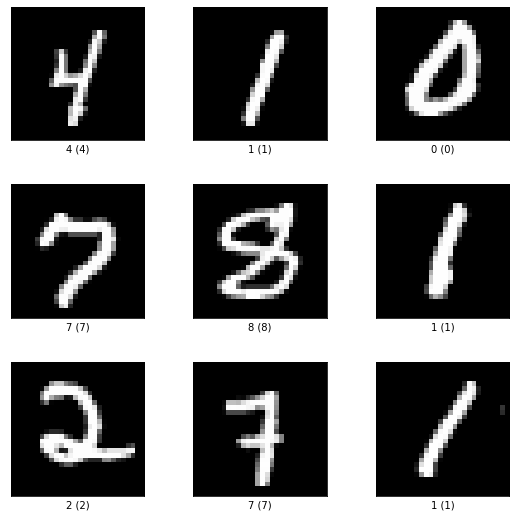

In [15]:
ds, info = tfds.load('mnist', 
                     split='train', 
                     with_info=True,
                     data_dir="D:/KeepStudy/0_Coding/0_dataset/tensorflow_datasets/")

fig = tfds.show_examples(ds, info)

<br>
<br>
<br>

## Access the dataset metadata

<font size=3 color=maroon>All builders include a `tfds.core.DatasetInfo` object containing the dataset metadata.

It can be accessed through:<br><br>

*   The `tfds.load` API:</font>

In [16]:
ds, info = tfds.load('mnist', 
                     with_info=True,
                     data_dir="D:/KeepStudy/0_Coding/0_dataset/tensorflow_datasets/")

In [17]:
info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='D:/KeepStudy/0_Coding/0_dataset/tensorflow_datasets/mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

<br>

<font size=3 color=maroon>

*   The `tfds.core.DatasetBuilder` API:

</font>

In [18]:
builder = tfds.builder('mnist')
info = builder.info

In [19]:
info
# 注意到下面的 data_path 与上面 tfds.load() 的方式不一样。

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\18617\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

<br>

<font size=3 color=maroon>The dataset info contains additional informations about the dataset (version, citation, homepage, description,...).</font>

In [21]:
# print(info)

<br>

### Features metadata (label names, image shape,...)

Access the `tfds.features.FeatureDict`:

In [22]:
info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

<br>

Number of classes, label names:

In [23]:
print(info.features["label"].num_classes)
print(info.features["label"].names)
print(info.features["label"].int2str(7))   # Human readable version (8 -> 'cat')
print(info.features["label"].str2int('7'))

10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
7
7


<br>

Shapes, dtypes:

In [24]:
print(info.features.shape)
print(info.features.dtype)
print(info.features['image'].shape)
print(info.features['image'].dtype)

{'image': (28, 28, 1), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}
(28, 28, 1)
<dtype: 'uint8'>


<br>
<br>

### Split metadata (e.g. split names, number of examples,...)

Access the `tfds.core.SplitDict`:

In [25]:
print(info.splits)

{'train': <SplitInfo num_examples=60000, num_shards=1>, 'test': <SplitInfo num_examples=10000, num_shards=1>}


<br>

Available splits:

In [26]:
print(list(info.splits.keys()))

['train', 'test']


<br>

Get info on individual split:

In [27]:
print(info.splits['train'].num_examples)
print(info.splits['train'].filenames)
print(info.splits['train'].num_shards)

60000
['mnist-train.tfrecord-00000-of-00001']
1


<br>

It also works with the subsplit API:

In [28]:
print(info.splits['train[15%:75%]'].num_examples)
print(info.splits['train[15%:75%]'].file_instructions)

36000
[FileInstruction(filename='mnist-train.tfrecord-00000-of-00001', skip=9000, take=36000, num_examples=36000)]


<br>
<br>
<br>

## Troubleshooting

### Manual download (if download fails)

If download fails for some reason (e.g. offline,...). You can always manually download the data yourself and place it in the `manual_dir` (defaults to `~/tensorflow_datasets/download/manual/`.

To find out which urls to download, look into:

 * For new datasets (implemented as folder): [`tensorflow_datasets/`](https://github.com/tensorflow/datasets/tree/master/tensorflow_datasets/)`<type>/<dataset_name>/checksums.tsv`. <br>
 
   For example: [`tensorflow_datasets/text/bool_q/checksums.tsv`](https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/text/bool_q/checksums.tsv).

   You can find the dataset source location in [our catalog](https://www.tensorflow.org/datasets/catalog/overview).


 * For old datasets: [`tensorflow_datasets/url_checksums/<dataset_name>.txt`](https://github.com/tensorflow/datasets/tree/master/tensorflow_datasets/url_checksums)

<br>

### Fixing `NonMatchingChecksumError`

TFDS ensure determinism by validating the checksums of downloaded urls.<br>
If `NonMatchingChecksumError` is raised, might indicate:

  * The website may be down (e.g. `503 status code`). Please check the url.
  * For Google Drive URLs, try again later as Drive sometimes rejects downloads when too many people access the same URL. See [bug](https://github.com/tensorflow/datasets/issues/1482)
  * The original datasets files may have been updated. In this case the TFDS dataset builder should be updated. Please open a new Github issue or PR:
     * Register the new checksums with `tfds build --register_checksums`
     * Eventually update the dataset generation code.
     * Update the dataset `VERSION`
     * Update the dataset `RELEASE_NOTES`: What caused the checksums to change ? Did some examples changed ?
     * Make sure the dataset can still be built.
     * Send us a PR

Note: You can also inspect the downloaded file in `~/tensorflow_datasets/download/`.

<br>
<br>
<br>

## Citation

If you're using `tensorflow-datasets` for a paper, please include the following citation, in addition to any citation specific to the used datasets (which can be found in the [dataset catalog](https://www.tensorflow.org/datasets/catalog/overview)).

```
@misc{TFDS,
  title = { {TensorFlow Datasets}, A collection of ready-to-use datasets},
  howpublished = {\url{https://www.tensorflow.org/datasets}},
}
```

<br>
<br>
<br>